### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

Para ello vamos a utilizar un conjunto de datos provenientes de un estudio de granos pertenecientes a distintas variedades de trigo. Los atributos de los datos provienen de una visualización de alta calidad de la estructura interna del grano utilizando una técnica de rayos X suaves. La ventaja de esta técnica es que no es destructiva y es considerablemente más económica que otras técnicas de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se registraron en placas KODAK de rayos X de 13x18 cm. Los estudios se llevaron a cabo utilizando grano de trigo cosechado en combinación procedente de campos experimentales, explorados en el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.


Los atributos observados son seis parámetros geométricos medidos en los granos de trigo:

V1: área A

V2: perímetro P

V3: longitud de la semilla

V4: ancho de la semilla

V5: coeficiente de asimetría

V6: longitud de la ranura de la semilla

Se trata de analizar de que manera estos atributos permiten generar grupos en los datos que correspondan idealmente a cada variedad de trigo disponible en los datos.

Warning message:
"package 'cluster' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


      V1    V2    V3    V4    V5    V6
1  16.63 15.46 6.053 3.465 2.040 5.877
2  20.03 16.90 6.493 3.857 3.063 6.320
3  15.60 15.11 5.832 3.286 2.725 5.752
4  10.82 12.83 5.180 2.630 4.853 5.089
5  14.79 14.52 5.545 3.291 2.704 5.111
6  14.03 14.16 5.438 3.201 1.717 5.001
7  16.44 15.25 5.884 3.505 1.969 5.533
8  13.78 14.06 5.479 3.156 3.136 4.872
9  18.76 16.20 6.172 3.796 3.120 6.053
10 12.88 13.50 5.139 3.119 2.352 4.607


       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

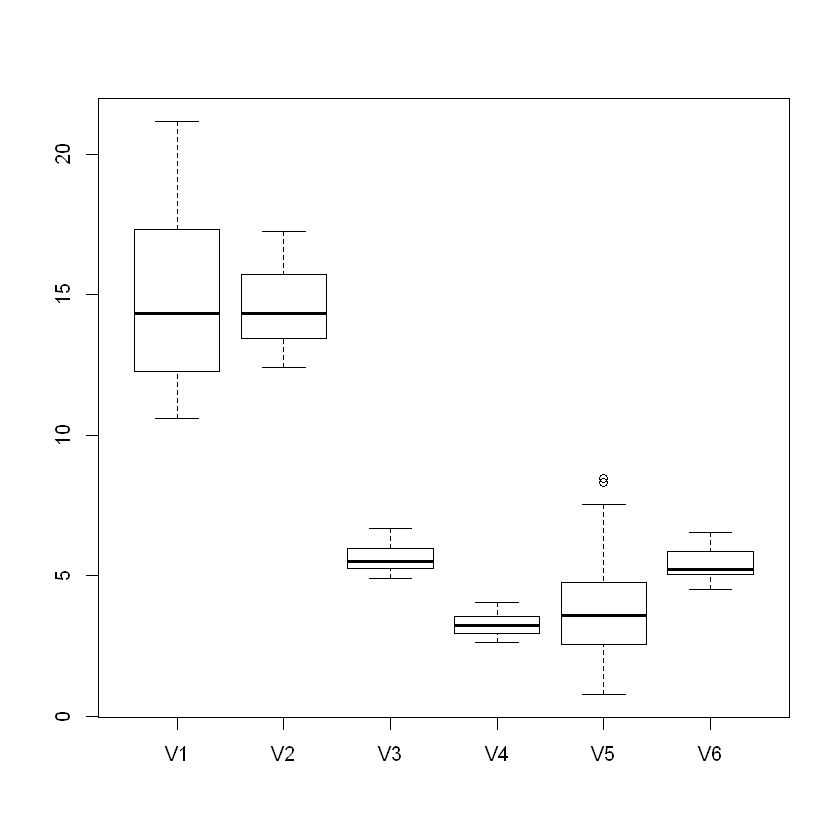

In [2]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")

print(datos[1:10,])
summary(datos)
boxplot(datos)

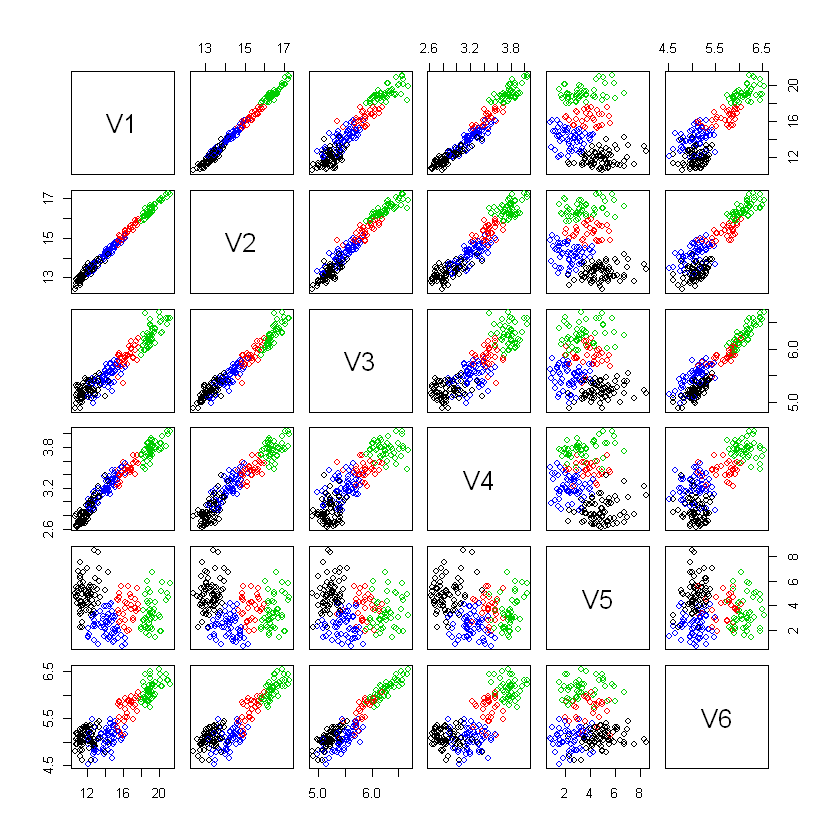

In [6]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Al considerar 2,3 o 4 grupos con el algoritmo KMeans, se obtienen grupos bastante bien diferenciados por las variables area, perimetro longitud de las semillas. Las tres últimas variables tienen valores con mayor nivel de confusión entre los grupos definidos por kmeans.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
-2.1449502,-0.6115826,-0.11654550,-0.03565510,0.002483217,0.007844728
1.2209796,-0.2371274,0.02424665,-0.03216181,0.006992513,-0.034944879
3.2304234,-0.2116132,-0.04972335,-0.04857660,0.008226285,0.018955948
-0.6521064,1.0430904,0.16993814,0.09992983,-0.013396969,-0.006634148


K-means clustering with 4 clusters of sizes 72, 31, 48, 59

Cluster means:
        V1       V2       V3       V4       V5       V6
1 11.91861 13.25681 5.225625 2.865319 4.885500 5.087472
2 16.40806 15.31935 5.863968 3.463323 3.850097 5.690452
3 19.15104 16.46917 6.268854 3.772938 3.460417 6.127250
4 14.10068 14.19559 5.475576 3.212542 2.370051 5.065847

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   3   2   1   4   4   2   4   3   4   1   4   2   2   3   1   1   2   2   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   3   4   1   1   2   1   4   4   3   4   4   1   4   2   3   3   1   4   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   3   4   1   3   3   1   1   1   3   1   2   1   4   4   2   4   3   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  4   3   1   2   3   4   3   2   2   1   3   4   2   3   

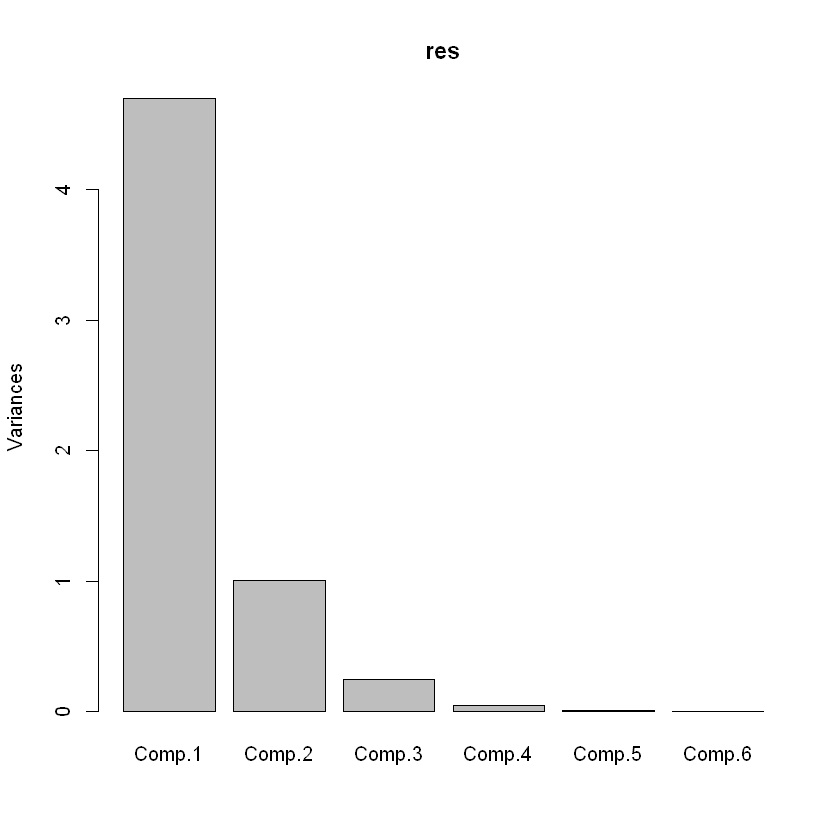

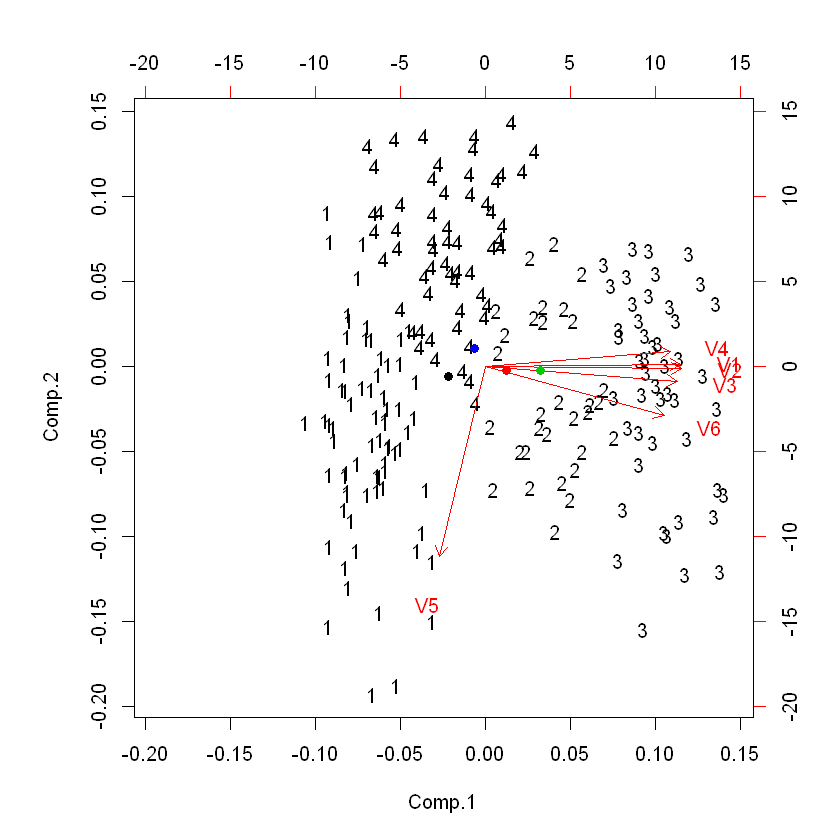

In [7]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 2 representa a las semillas con mayores valores de todas las variables excepto V5, el coeficiente de simetría. El grupo 1 representa las semillas con valores intermendios de las distintas variables  y los grupos 3 y 4 con los menores valores. Se distinguen el grupo 3 del 4 por sus mayores valores de V5 el coeficiente de simetría. 


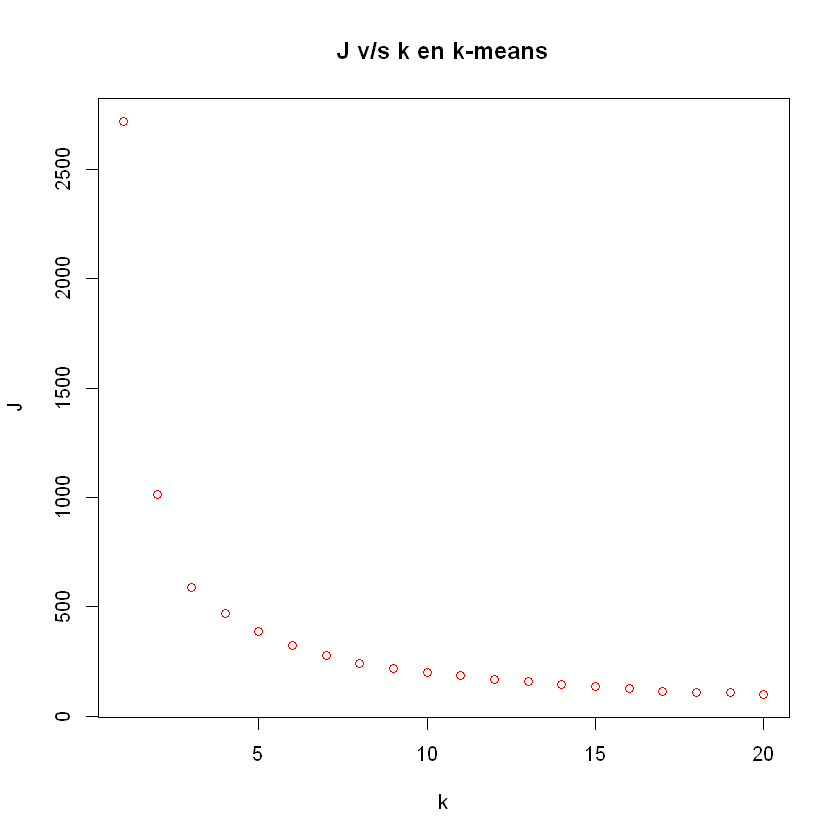

In [8]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

### Ejercicio 1:

1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Explique su decisión.
2. Realice nuevamente los cálculos con el K óptimo y  caracterice los grupos obtenidos. Interprete sus resultados

### Respuesta 1
1.1 De acuerdo a la heurística vista en clases, el codo en el gráfico se encuentra en k=3. 

1.2 El agrupamiento considerando 3 grupos es mucho mas preciso que el realizado con 4 grupos como se puede observar al comparar las proyecciones de los datos en el primer plano principal, que representa el 95% de la variabilidad de los datos. En este caso disminuye mucho la zona de intersección entre los grupos. 
De acuerdo a los gráficos de mas abajo, en el primer eje principal, se ubica mas a la izquierda el Grupo 1, luego el Grupo 3 y finalmente el Grupo 2. El biplot nos indica que las observaciones a la izquierda son aquellas con mayores valores de las variables V1, V2, V3, V4 y V6. Por otra parte, considerando el segundo eje principal, que está asociado con la variable V5, coeficiente de asimetría, se observa que el Grupo 2 presenta mayores valores del coeficiente de asimetría que aquellas semillas incluídas en el Grupo 3.
De esta manera, en el Grupo 1 se ubican las semillas con mayores valores de todas las variables a excepción de V5. En el Grupo 3 se agrupan las semillas con valores intermedios de las variables V1, V2, V3, V4 y V6 y menores valores de V5 y por último en el Grupo 2 se encuentran las semillas con menores valores de todas las variables a excepción de V5.

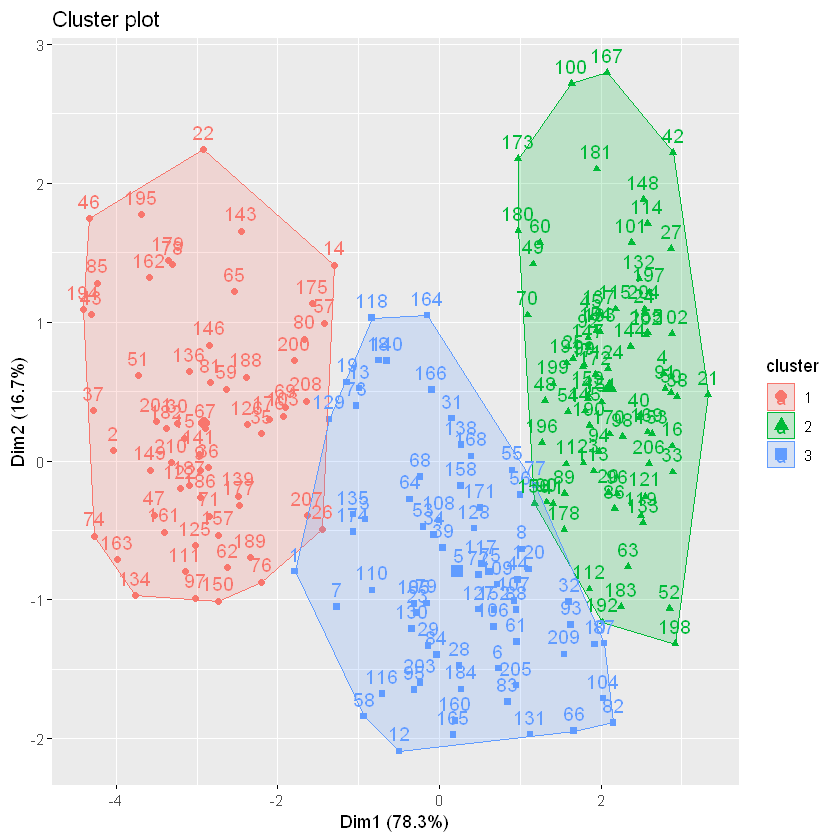

In [13]:
df <- data.frame(datos)
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
fviz_cluster(cl, df)

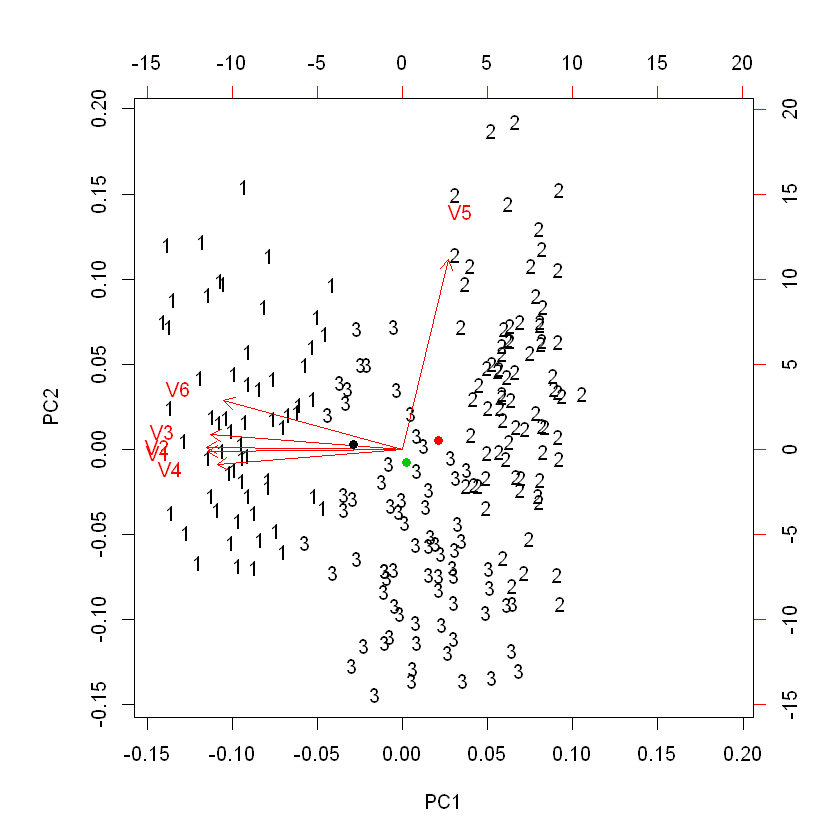

In [14]:
res <- prcomp(datos,scale=TRUE)
res2 <- predict(res,cl$centers)
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

## Otras alternativas de cálculo

Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


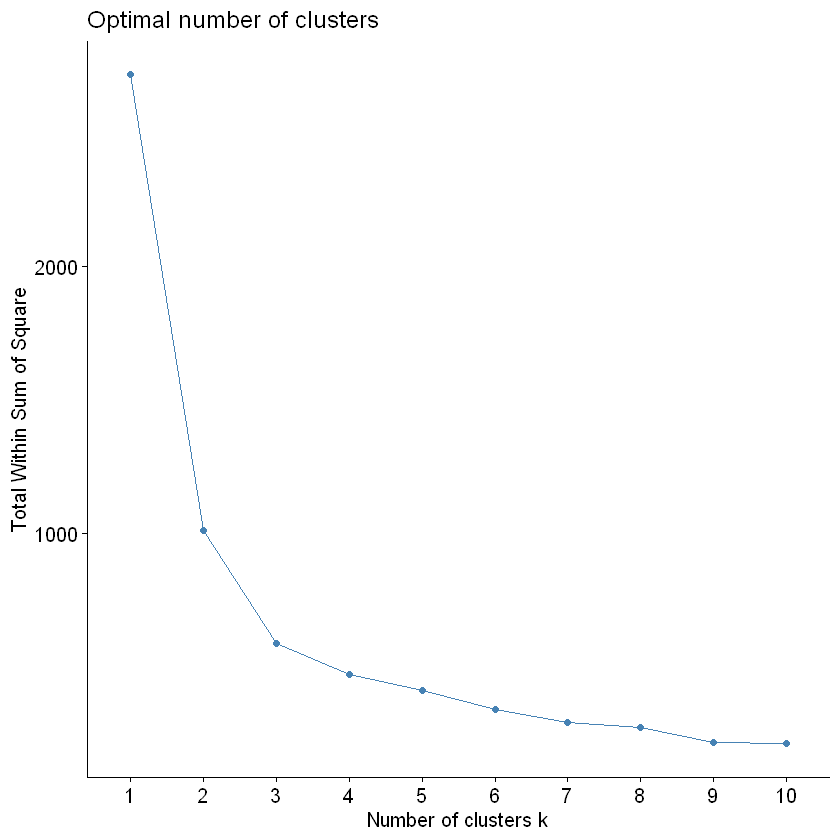

In [5]:
library(cluster)
library(factoextra)
df <- data.frame(datos)
fviz_nbclust(df, kmeans, method = "wss")


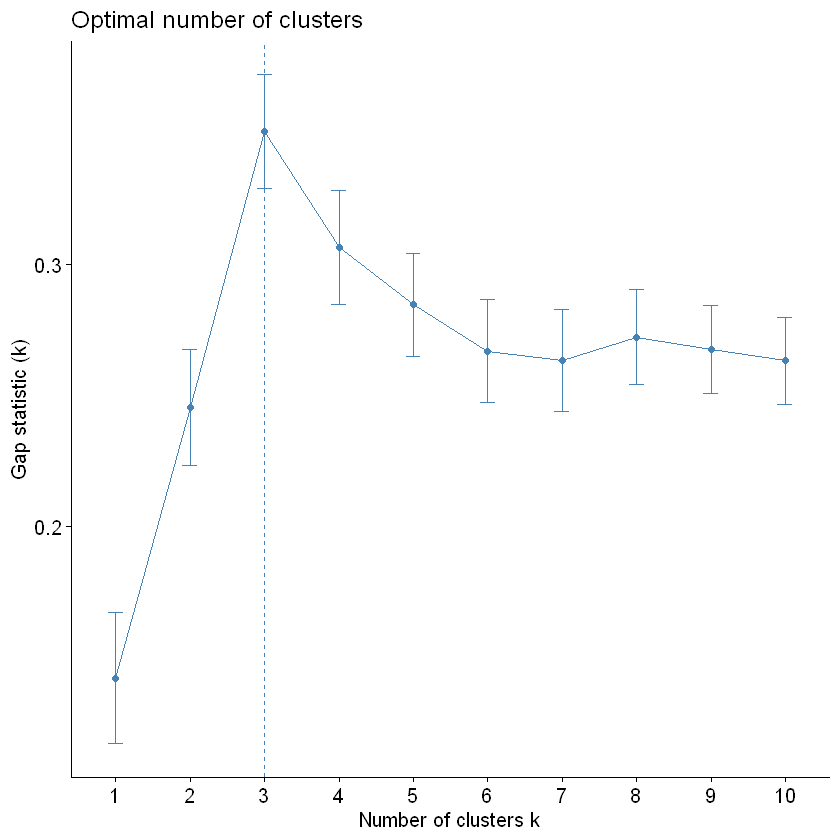

In [6]:
#calculo de gap estadístico basado en el número de grupos: 
#tasa entre la suma de distancias intragrupos con k grupos y con un sólo un grupo
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

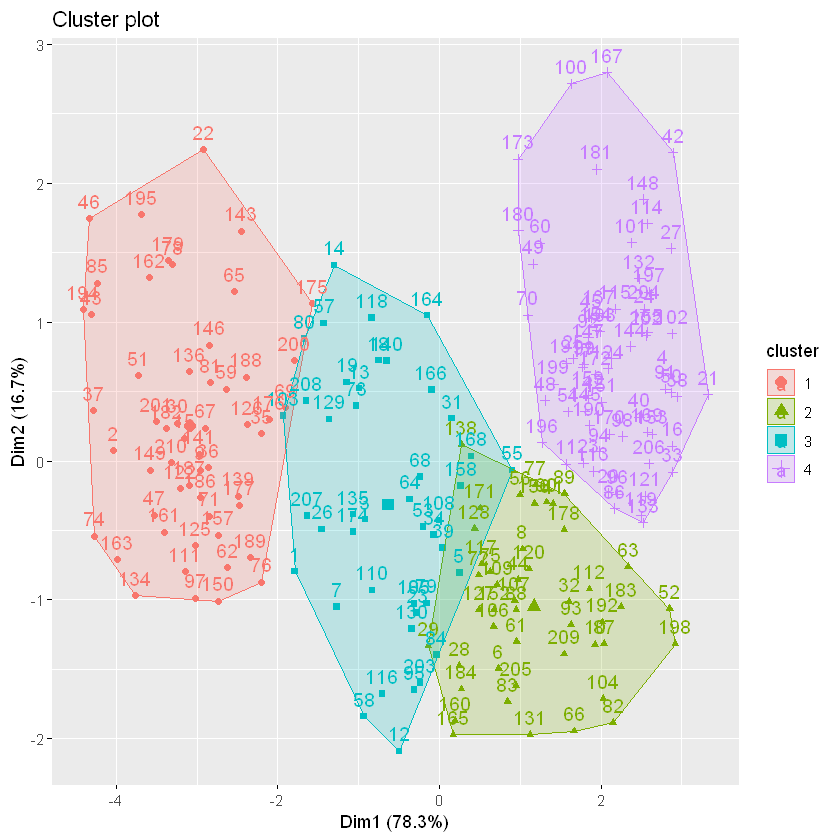

In [54]:
fviz_cluster(cl, df)

### Ejercicio 2:
Realice un análisis de clustering con un subconjunto de datos de datosComunas.csv (puede escoger variables (al menos 5) y comunas (al menos 30) indicando el criterio utilizado en su elección.

1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento
2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 
3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados


In [24]:
datosC <- read.csv("..//data//datosComunas.csv",header=TRUE,sep=";",dec=",")

In [25]:
datosC[1:10,]

Comuna,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,S5,S6,S7,S8,S9,S10,S11,P1,E1,E2
IQUIQUE,238.7030,1.72,1961.235,0.84,81.49160,86.31254,2.13,1140.8336,16.34,...,6949,9.92,4.44,0.30,4.38,19.74,0.74,10.93,10.88373,29.65
ALTO HOSPICIO,185.2202,2.87,1846.297,1.14,77.13106,82.78525,3.29,878.0621,32.75,...,4978,15.32,3.19,2.41,7.76,27.55,0.67,8.83,63.36414,29.09
ANTOFAGASTA,224.1951,2.47,1375.518,1.03,54.05173,93.66913,2.31,1249.4364,6.44,...,13240,7.73,4.34,1.17,5.06,16.58,0.41,19.47,16.32580,25.43
CALAMA,816.2048,3.98,1902.088,1.18,78.97949,83.62586,4.17,1083.3625,12.69,...,4884,10.29,2.77,0.13,4.59,13.67,0.57,17.61,22.60442,28.32
COPIAPà,337.0193,3.92,1812.947,2.19,84.82275,86.97373,5.22,1270.2870,15.06,...,3609,7.76,2.37,2.75,6.26,23.33,0.45,25.54,36.16117,34.38
TIERRA AMARILLA,341.1337,7.72,2355.437,6.49,83.03797,59.28101,10.25,1576.5882,40.59,...,243,11.67,2.19,2.09,14.25,31.41,0.30,37.14,23.49085,56.45
VALLENAR,466.2418,4.86,1357.581,2.86,82.43124,99.38829,6.93,1119.8743,17.66,...,1139,6.93,2.37,0.23,8.83,21.21,0.27,39.24,56.72439,38.47
LA SERENA,219.1191,5.65,1689.138,8.29,77.36026,79.38449,11.01,1211.2592,8.61,...,3127,4.82,2.10,0.03,10.24,20.13,0.38,14.00,29.15916,25.04
COQUIMBO,266.8177,5.08,2781.072,1.41,79.53492,52.89320,4.86,1500.4069,7.25,...,3357,6.17,1.73,0.40,13.41,18.03,0.45,17.19,43.67056,26.76
OVALLE,292.3219,4.06,1073.380,1.51,86.27414,85.76201,4.91,996.2722,11.15,...,1592,6.43,1.75,0.00,5.74,26.12,0.29,13.78,63.67889,34.88


### Respuesta 2.1
Los datos corresponden a 99 comunas de Chile que se han caracterizado por distintos índices relacionados con la calidad urbana de las mismas, se considera por una parte el Acceso a servicios y equipamiento público (letra A), acceso a movilidad sustentable (letra M), calidad del medio ambiente urbano (letra C),integración social y calidad de barrios y viviendas (letra S), planificación (letra P) y crecimiento económico inclusivo y sostenible (letra E). 

Considerando el análisis exploratorio y de ACP realizado en la tarea anterior, se propone (como ejemplo ilustrativo), analizar solamente las comunas de la región metropolitana y del tipo de variables de la letra A. Efectivamente, en dicho análisis se constató que existe un agrupamiento de las comunas asociado a las zonas geográficas de la región metropolitana que sabemos estan fuertmente segmentadas. La idea aqui es verificar si considerando las variables asociadas a acceso de  a servicios y equipamiento público básico, se puede caracterizar dicho agrupamiento.



In [27]:
datos2 <- datosC[54:95,1:13]
datos2

,Comuna,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12
54,SANTIAGO,354.4907,1.15,790.22939,3.86,68.07196,100.00000,4.64,1185.6366,1.79,384.7996,2.16,389.6287
55,CERRILLOS,614.1644,4.42,717.81217,10.80,86.38899,99.97686,14.58,1243.0830,1.45,733.6970,1.05,349.7809
56,CERRO NAVIA,492.8174,2.35,647.91718,3.73,93.82935,99.99698,5.94,753.9345,8.67,362.0655,0.93,278.3139
57,CONCHALÖ,696.1542,2.86,805.65392,0.61,93.82966,100.00000,3.30,833.5957,11.89,361.6178,1.38,308.2389
58,EL BOSQUE,253.6614,2.16,1363.62227,0.31,79.42398,98.50258,2.03,730.4940,19.83,382.6842,1.47,294.2955
59,ESTACIàN CENTRAL,369.2583,2.72,855.60168,1.68,74.60074,100.00000,3.79,1032.0184,5.12,441.7615,1.37,328.1062
60,HUECHURABA,400.0889,3.56,2058.45374,9.91,85.04398,78.62855,10.78,1313.1644,7.31,1331.5069,0.50,795.3856
61,INDEPENDENCIA,257.4618,1.79,1176.43505,0.28,67.72422,100.00000,1.55,889.5460,5.60,360.0586,1.50,359.2071
62,LA CISTERNA,221.0380,2.58,1475.67851,0.36,53.77526,98.58380,1.78,1039.4319,11.57,402.7078,1.94,330.5472
63,LA FLORIDA,344.7935,3.46,1661.63344,0.63,90.66453,93.12525,3.76,1171.9846,6.64,556.7530,1.32,427.5360


       A1              A2              A3                A4        
 Min.   :171.0   Min.   :1.150   Min.   :  85.25   Min.   : 0.280  
 1st Qu.:246.4   1st Qu.:2.490   1st Qu.: 823.25   1st Qu.: 1.055  
 Median :307.7   Median :3.215   Median :1047.68   Median : 2.215  
 Mean   :362.4   Mean   :3.678   Mean   :1174.81   Mean   : 4.223  
 3rd Qu.:420.8   3rd Qu.:3.908   3rd Qu.:1376.12   3rd Qu.: 4.482  
 Max.   :938.1   Max.   :9.470   Max.   :3263.43   Max.   :18.040  
       A5              A6               A7               A8        
 Min.   :48.50   Min.   : 15.02   Min.   : 1.550   Min.   : 367.0  
 1st Qu.:68.35   1st Qu.: 91.60   1st Qu.: 3.850   1st Qu.: 815.4  
 Median :83.50   Median : 99.71   Median : 4.730   Median :1053.5  
 Mean   :78.80   Mean   : 90.92   Mean   : 6.418   Mean   :1146.2  
 3rd Qu.:90.46   3rd Qu.:100.00   3rd Qu.: 7.112   3rd Qu.:1254.8  
 Max.   :97.09   Max.   :100.00   Max.   :18.670   Max.   :2888.8  
       A9              A10              A11     

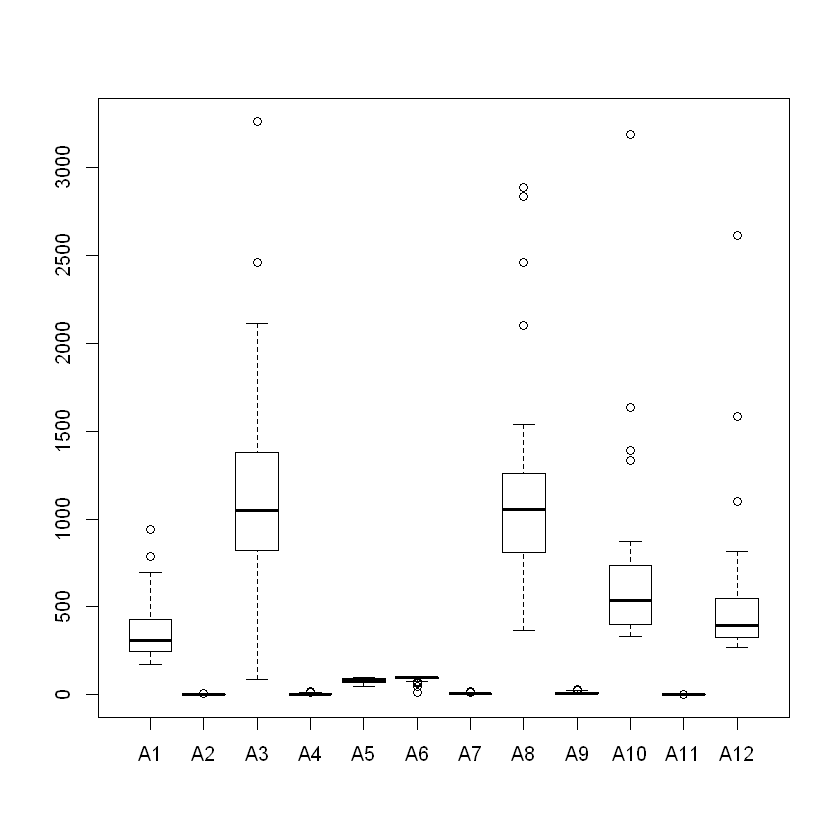

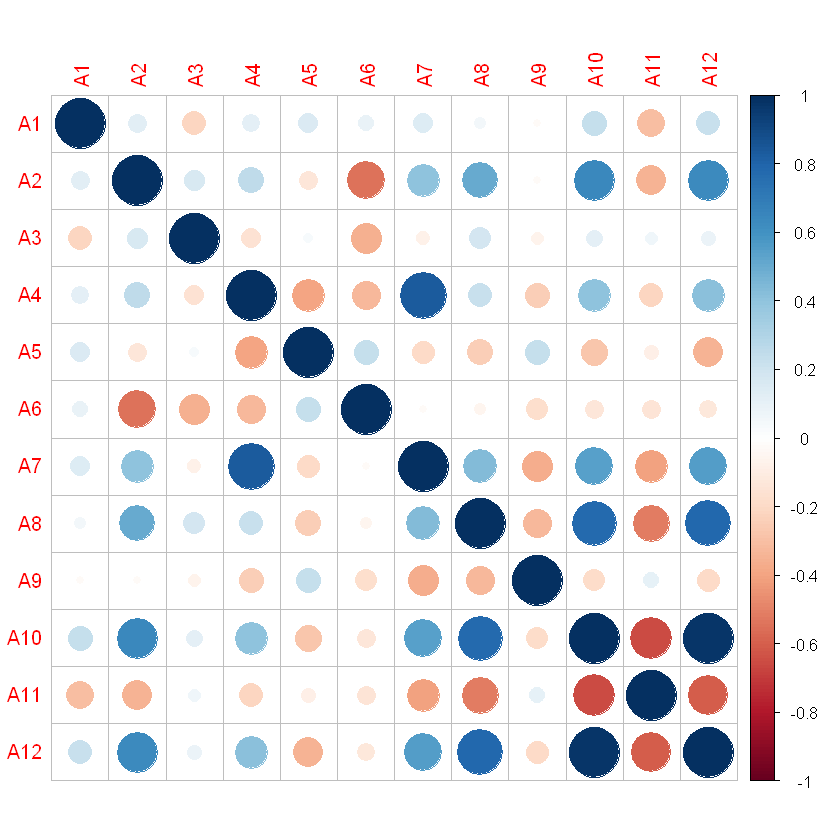

In [28]:
library(corrplot)
summary(datos2[,2:13])
boxplot(datos2[,2:13])
sigma <- cor(datos2[,2:13])
corrplot(sigma)

[1] 0.3806558558 0.1469325506 0.1279997472 0.1021073532 0.0717033950
 [6] 0.0606126363 0.0418164962 0.0300723122 0.0213065237 0.0145066003
[11] 0.0016499903 0.0006365393

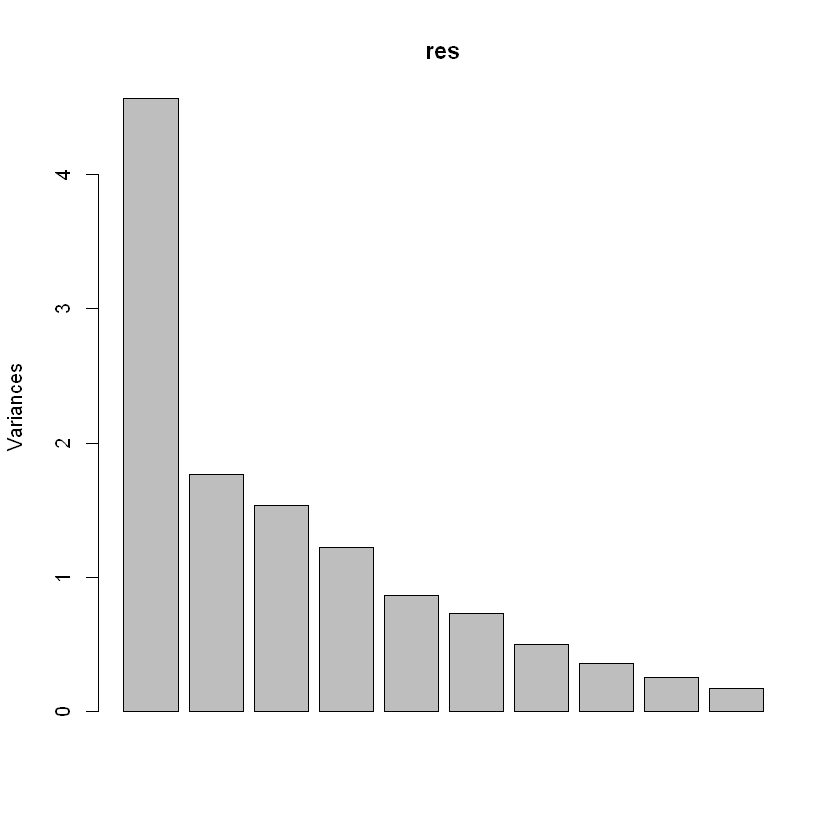

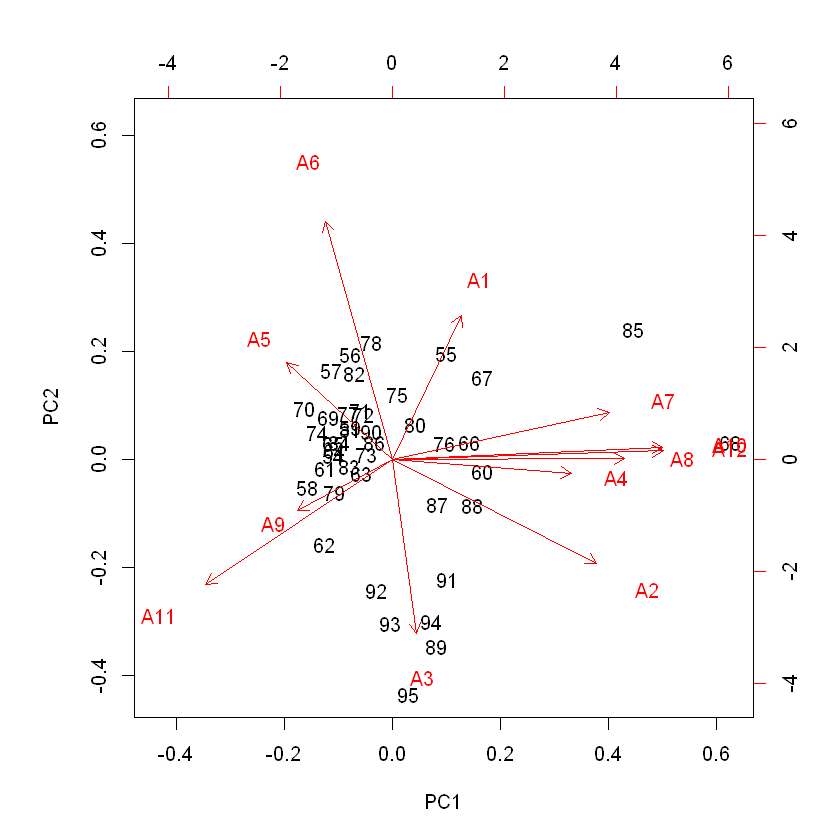

In [29]:
res <- prcomp(datos2[,2:13],scale=TRUE)
res$sdev^2/sum(res$sdev^2)
plot(res)
biplot(res)

### Respuesta 2.2 y 2.3
De acuerdo a los análisis expuestos mas abajo, el número de grupos mas adecuado es K=3. Con este número de grupos, kmeans genera 3 grupos en que se distingue claramente las comunas de la zona oriente como el Grupo 1, luego algunas comunas de la zona sur como el Grupo 2 y la mayor parte de las comunas de la región metropolitana quedan incluídas en el Grupo 3. El Grupo 1 se caracteriza por mayores valores de las variables: porcentaje de areas verdes, parques y equipamiento en educación (A4, A7, A8 y A12). El Grupo 2 se caracteriza por mayores valores de la variable distancia a parques públicos (A3) y menores valores de la variable porcentaje de población atendida por parques públicos (A6), es decir no cuentan con parques cercanos.

In [34]:
df2 <- data.frame(datos2[,2:13])

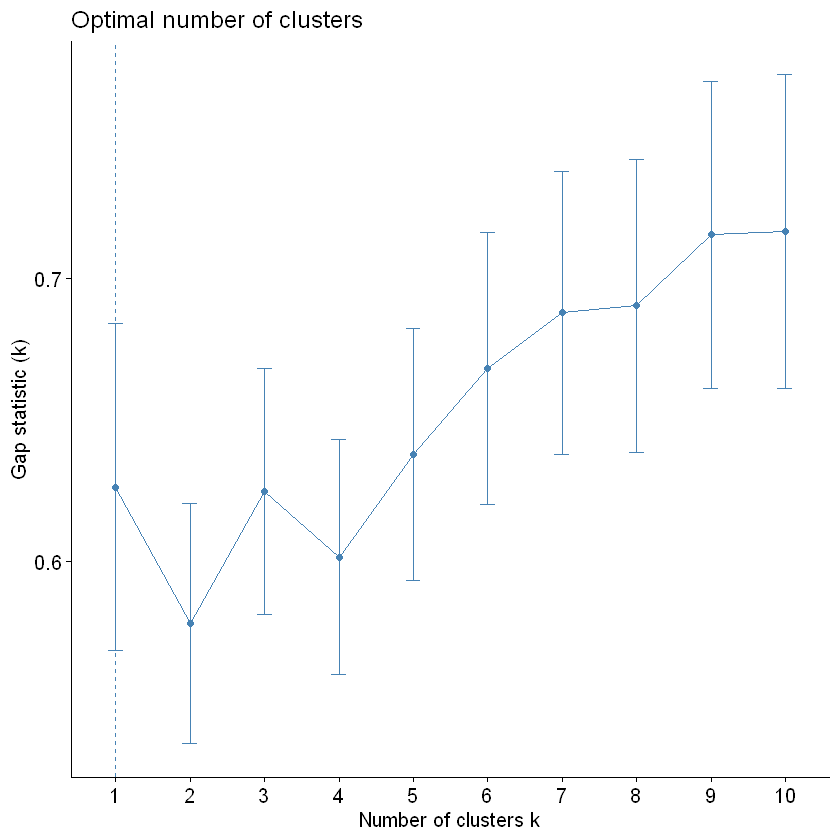

In [35]:
gap_stat <- clusGap(df2,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

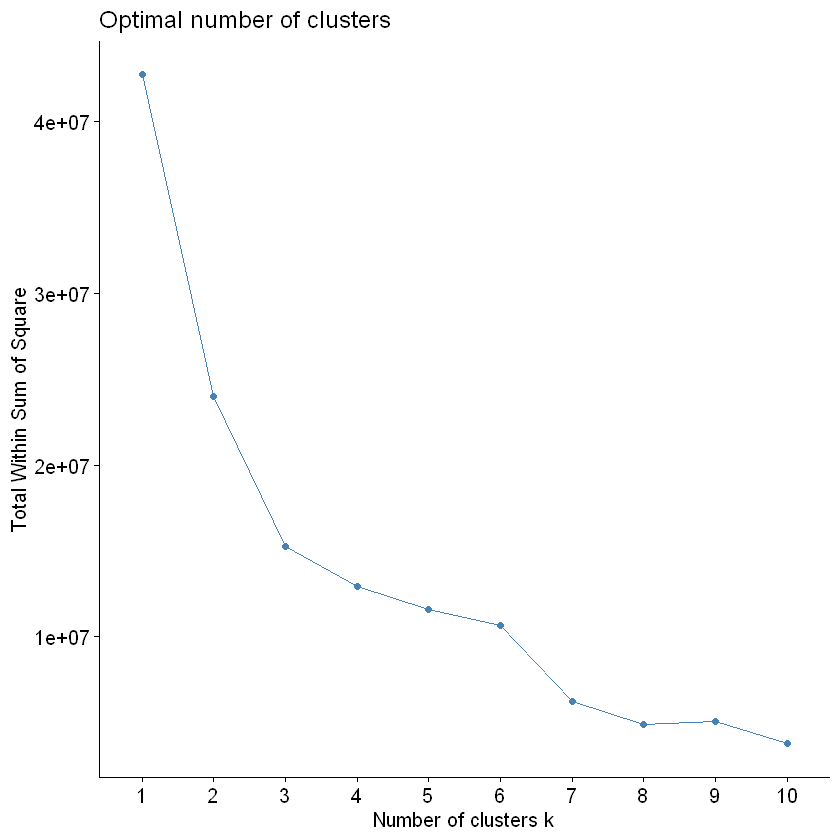

In [36]:
library(cluster)
library(factoextra)
fviz_nbclust(df2, kmeans, method = "wss")


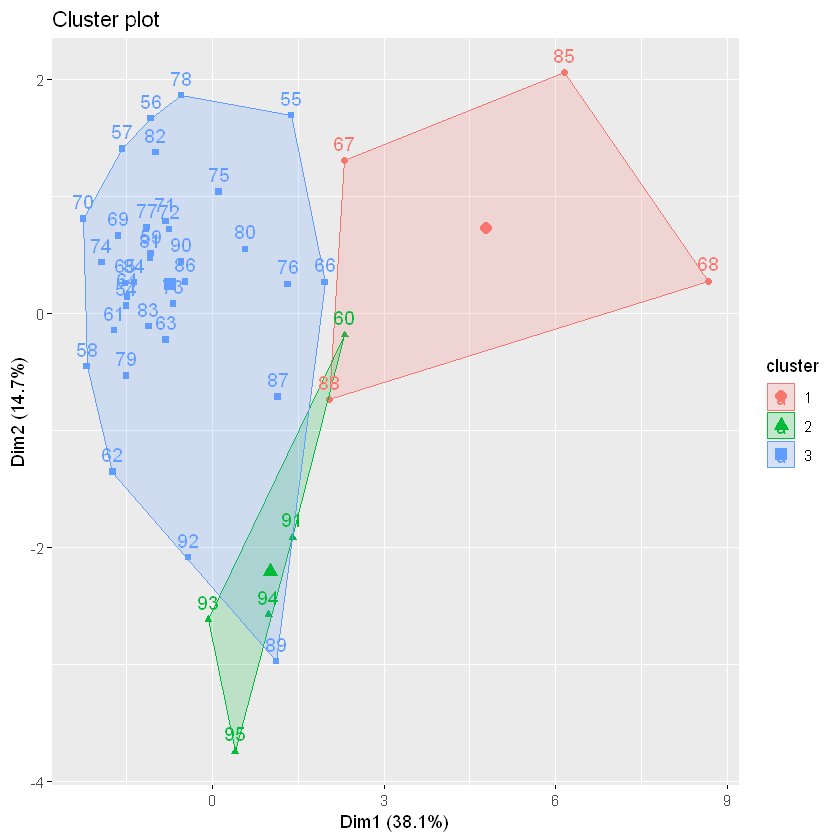

In [37]:

k0=3
cl<-kmeans(datos2[,2:13],k0,iter.max=1000,nstart=10)
fviz_cluster(cl, df2)

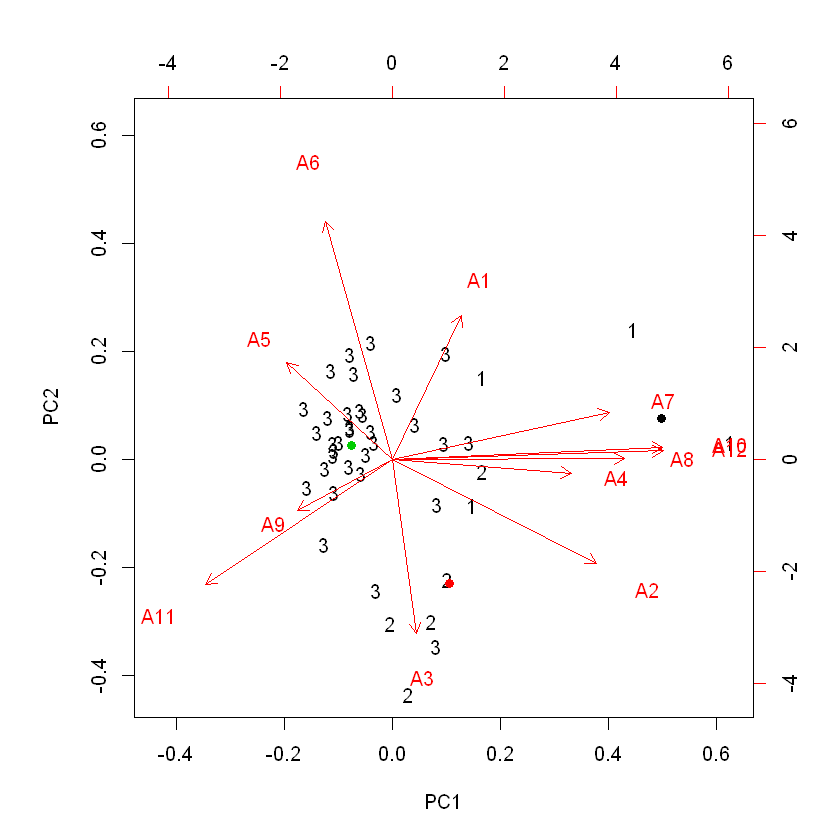

In [38]:
res <- prcomp(datos2[,2:13],scale=TRUE)
res2 <- predict(res,cl$centers)
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)